# Structure

- optimisation basics
- linear optimisation basics
- solving libraries
- introduction to the PuLP framework
- example: using PuLP to solve a Sudoku puzzle
- example: using PuLP to solve a Nonogram puzzle
- applications

# Python environment setup

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [68]:
# asthetics
figsize(15,5)

# Optimisation basics

- aim to minimise or maximise a single value (same thing mathematically)
- if multiple objectives, define trade-offs betewen them, so still effectively a minimisation of one value

## Terminology
- unconstrained: all variables have domain $[-\infty,\infty]$
    - e.g. minimise $f(x) = x^2 + 5$, solution $x = 0$
- constrained: some variables have constrained domain
    - e.g. minimise $f(x) = x^2 +5$ where $x\geq3$, solution $x=3$
- convex: gradients always lead to the global minimum
- non-convex: there can exist local minima -- this can confuse optimisers that only follow the gradient
- multi-dimensional: having more than one control variable

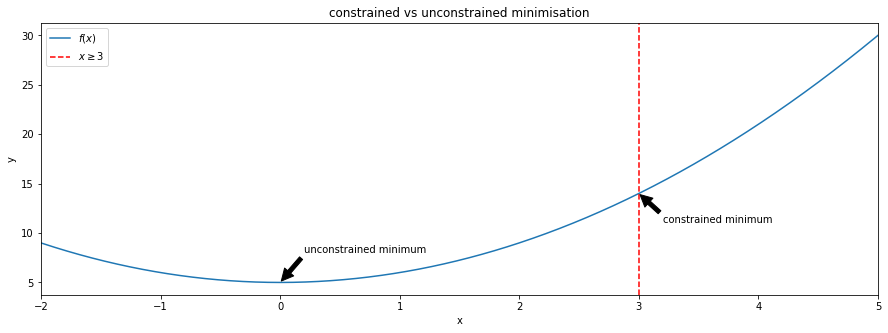

In [4]:
# constrained vs unconstrained minimisation example

title('constrained vs unconstrained minimisation')

def f(x):
    return x**2 + 5

x = linspace(-2,5, 1000)

plot(x,f(x), label='$f(x)$')
xlabel('x');
ylabel('y');

axvline(3, color='r', linestyle='--', label='$x \geq 3$')

xmin = 3
ymin = f(xmin)
annotate('constrained minimum', xy=(xmin,f(xmin)), xytext=(xmin+.2, ymin -3), arrowprops=dict(facecolor='black', shrink=0.05))

xmin = 0
ymin = f(xmin)
annotate('unconstrained minimum', xy=(xmin,f(xmin)), xytext=(xmin+.2, ymin +3), arrowprops=dict(facecolor='black', shrink=0.05))


xlim(-2,5)
legend()
grid(False)

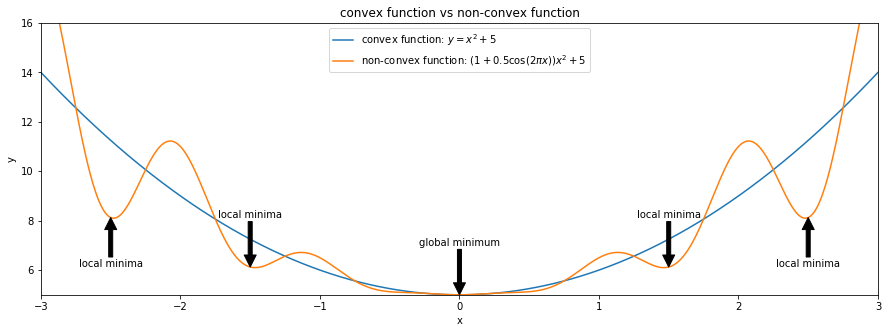

In [5]:
# convex function vs non-convex function

title('convex function vs non-convex function')

def convex(x):
    return x**2 + 5

def nonconvex(x):
    return (1 + 0.5*cos(2*pi*x)) * x**2 + 5

x = linspace(-3,3, 1000)
y = f(x)

plot(x,convex(x), label='convex function: $y = x^2 +5$')
plot(x,nonconvex(x), label='non-convex function: $(1 + 0.5 \cos(2 \pi x))  x^2 + 5$')

xlabel('x');
ylabel('y');

# From inspection it can be seen that minimas will occur when cos(2*pi*x) is at minimum. This occurs periodically whenever 2x is an odd integer. 
# Therefore there will be a minima when x = i + 0.5, where i is in the set of all integers. 


xmin = -2.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin -2), arrowprops=dict(facecolor='black'))

xmin = -1.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))

xmin = 1.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))

xmin = 2.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin -2), arrowprops=dict(facecolor='black'))

xmin = 0
ymin = nonconvex(xmin)
annotate('global minimum', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))


xlim(-3,3)
ylim(5,16)
legend(loc='upper center')
grid(False)

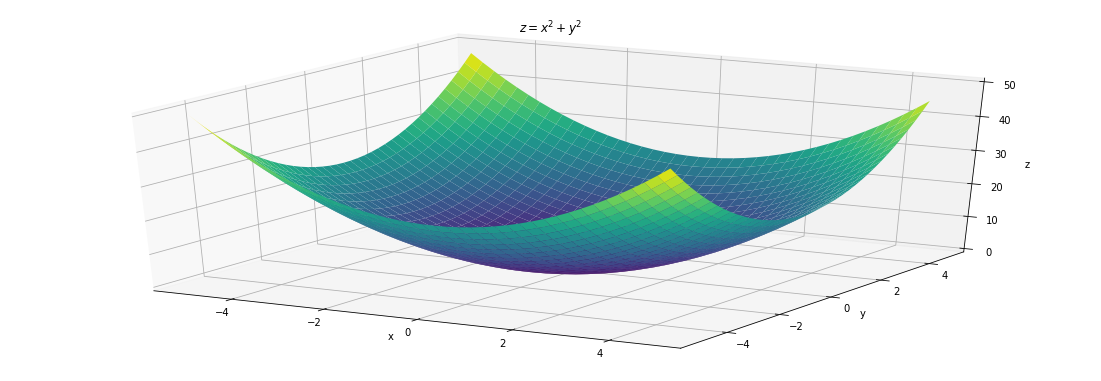

In [19]:
# multidimensional minimisation

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.set_title('$z = x^2 + y^2$');

## Hardness of problems

Common  classifications:

- P: "polynomial time": having [time complexity](https://en.wikipedia.org/wiki/Time_complexity) $O(n^\alpha)$ to get to a solution
    - e.g. graph colouring with 2 colours without any adjacency of the same colour
- NP: "nondeterministic polynomial time", solution can be verified but not solved deterministically in polynomial time
    - e.g. integer factorization problem: given integers n and k, is there a factor f with 1 < f < k and f dividing n?
- EXPTIME: "exponential time"
    - e.g. finding an optimal chess strategy
    
<img src="images/problem_hardness.png", width=300>

Trivia: The question of [whether P=NP is still unsolved](https://en.wikipedia.org/wiki/P_versus_NP_problem). If this is true it has profound implications, for example in cryptographic security. 

# Linear optimisation

- means only linear combinations of decision varaibles:
    - e.g. $\min ( x + y ) $ is ok, but $\min (x y)$ or $ min(x^2 + y)$ is not ok
- is convex as all linear functions are convex
- is constrained (has to be as any unconstrained linear function would have a minimum of negative infinity)
- is solvable in polynomial time and is therefore [NP complete](https://en.wikipedia.org/wiki/NP_(complexity))

e.g. <br>
> minimise <br>
> $x - 5y$ <br>
> subject to <br>
>   $x \geq 5$ <br>
>   $y \leq 3$ <br>

# Solving linear optimisation problems

- previous example is trivial and can be solved in your head
- but what about a more complex example?

> minimise <br>
> $4a+3b-10c+7d-12e+17f-14g-2h$ <br>
> subject to <br>
> $15a + 3c -f \geq 2a + h - 14b$ <br>
> $18d - e + 3b \leq 32h - 4a + h$ <br>
> $3e + 10c -2a \geq 18b - 13f + 17d$ <br>

## Intuition

With two decision variable $x,y$ we can visualise the decision space as a three dimensional object with the $z$ axis as the objective to be minimised. 

Minimise<br>
    $2y-5x$+100<br>
Subject to<br>
    $x \geq 2$<br>
    $x \geq 7 - y$<br>
    $x \leq 2y-9$<br>
    $x \geq y+5$<br>
    $x \leq 13 - y$<br>

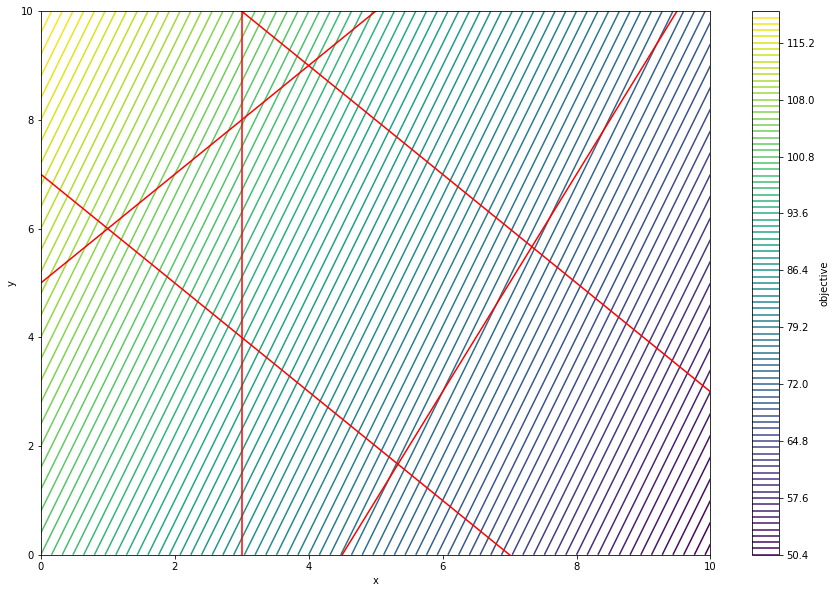

In [114]:
# visual representation of a 2D linear problem

def objective(X, Y):
    return 2*Y - 5*X + 100

x = linspace(0,10,100)
y = linspace(0,10, 100)

X,Y = meshgrid(x,y)

Z = objective(X,Y)

figsize(15,10)

contour(X, Y, Z, 100, cmap=cm.viridis)
colorbar(label='objective')

axvline(3, color='red')
plot(x, 7-y, color='red')
plot(x, 2*y-9, color='red')
plot(x, y+5, color='red')
plot(x, 13-y, color='red')


xlim(0,10)
ylim(0,10)
xlabel('x');
ylabel('y');

## The Simplex Method

- Discovered by George Dantzig in 1946 when a colleague challenged him to mechanise the US military planning process in order to distract him from changing job
- There is an infinate volume to search inside the space, but Dantzig noticed the minimum (it is convex) or maximum will always occur at a corner (in mathematics this is called a simplex) if a feasible solution is available
- Algorithm quite simple:
    1. draw the feasible region
    2. pick a corner and calculate the objective value
    3. calculate the objective for adjacent corners
    4. if it has a better objective value than the current corner, move to this corner, else, you have found the optimal solution

# "The algroithm that runs the world"

Described as ["the algorithm that runs the world" by the New Scientist](http://www.cccblog.org/2012/08/20/the-algorithm-that-runs-the-world/), it is used in almost every aspect of industry, including:

- scheduling
- industrial processes
- logistics
- operations
- product design
- ...

<img src="images/new_scientist_front_cover.jpg" width=300 align="left">

<img src="images/easyjet-plane.jpg" width=300 align="left">

<img src="images/aston-martin-factory.jpg" width=300 align="left">



# Mixed Integer Linear Programming (MILP)